# Continuous Time Model Simulating Breast Cancer States

## Introduction

In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
Q = np.array([[-0.0085, 0.005, 0.0025, 0, 0.001],
              [0, -0.014, 0.005, 0.004, 0.005], 
              [0, 0, -0.008, 0.003, 0.005],
              [0, 0, 0, -0.009, 0.009],
              [0, 0, 0, 0, 0]])

max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)
time_until_next_state = np.random.exponential(scale = 1/-Q[0][0], size = n_women)

#plt.hist(time_until_next_state)
#print(time_until_next_state)# 


while np.min(women_states) < max_state:
# Get all individuals with state less than five (alive)
    women_alive_index = np.where(women_states < 5)[0]

    # Decide next event

    # Get minimum time until next state, only based on individuals alive
    time_min = np.min(time_until_next_state[women_alive_index])
    time_min_index = np.where((time_until_next_state == time_min))[0]
    time_until_next_state[women_alive_index] = time_until_next_state[women_alive_index] - time_min

    # Update states
    for elem in time_min_index:
        current_state = int(women_states[elem])
        probs = -Q[current_state-1,current_state:]/Q[current_state-1,current_state-1]
        new_state = np.random.choice(states[current_state:], p = probs)
        women_states[elem] = new_state
        
        # Update time only if state is not 5
        if new_state < 5: 
            time_until_next_state[elem] = np.random.exponential(scale = 1/-Q[new_state-1][new_state-1])

    # Update liftime
    lifetime[women_alive_index] += time_min

    #print("State:\t\t", women_states, )
    #print("Lifetime:\t",lifetime)
    #print("\n")


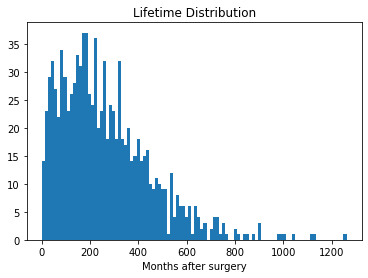

In [11]:
# Illustrate distribution of lifetime
plt.figure()
plt.title("Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.hist(lifetime, bins = 100)
plt.show()